In [7]:
import urllib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words('english')

# Data loading

In [11]:
links = ['https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt',
              'https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt',
              'https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/joy-ratings-0to1.train.txt',
              'https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/sadness-ratings-0to1.train.txt']

In [14]:
def get_data(link):
    response = urllib.request.urlopen(link)
    if response.code==200:
        return response.read().decode()
    else:
        return ''

In [15]:
data_col = []
for link in links:
    data = get_data(link)
    data = data.split('\n')
    data = [i.split('\t')[1:] for i in data]
    data_col.extend(data)
df = pd.DataFrame(data_col, columns=['sentence','emotion','degree'])

In [16]:
df.head()

,sentence,emotion,degree
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896


In [17]:
len(df)

3617

# Data analysis

In [18]:
df['degree'] = df['degree'].astype(float)

<AxesSubplot:>

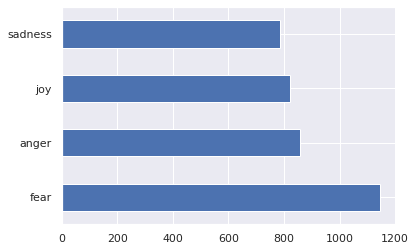

In [19]:
df['emotion'].value_counts().plot.barh()

/home/volodymyr/Parallel-emotional-intent-clustering/env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree', ylabel='Density'>

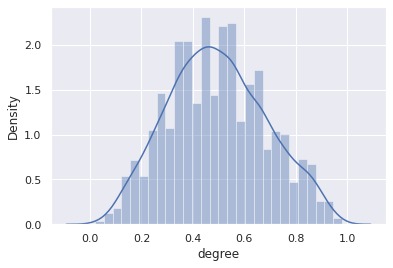

In [20]:
sns.distplot(df['degree'])

In [21]:
df['degree'].min(), df['degree'].max()

(0.019, 0.98)

In [22]:
df.loc[:5]

,sentence,emotion,degree
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896
5,My blood is boiling,anger,0.875


In [23]:
from collections import Counter

In [24]:
def clean(x):
    for i in ['!', '?', '.', ',']:
        x = x.replace(i, ' ')
    x = x.strip()
    x = x.split(' ')
    x = [i for i in x if not i in stop_words+['I', 'me', 'you', '']]
    x = ' '.join(x)
    return x

In [25]:
def most_frequent_tokens(df, emotion='joy', n=50):
    tmp_df = df[df['emotion']==emotion].copy()
    tmp_df['sentence'] = tmp_df['sentence'].apply(clean)
    tokens = Counter(np.hstack(tmp_df['sentence'].apply(lambda x: x.split(' ')).values))
    tokens, counts = zip(*sorted(tokens.items(), key = lambda x: x[1])[::-1][:n])
    plt.figure(figsize=(12,12))
    plt.barh(range(len(counts)),counts)
    plt.yticks(range(len(counts)), tokens)

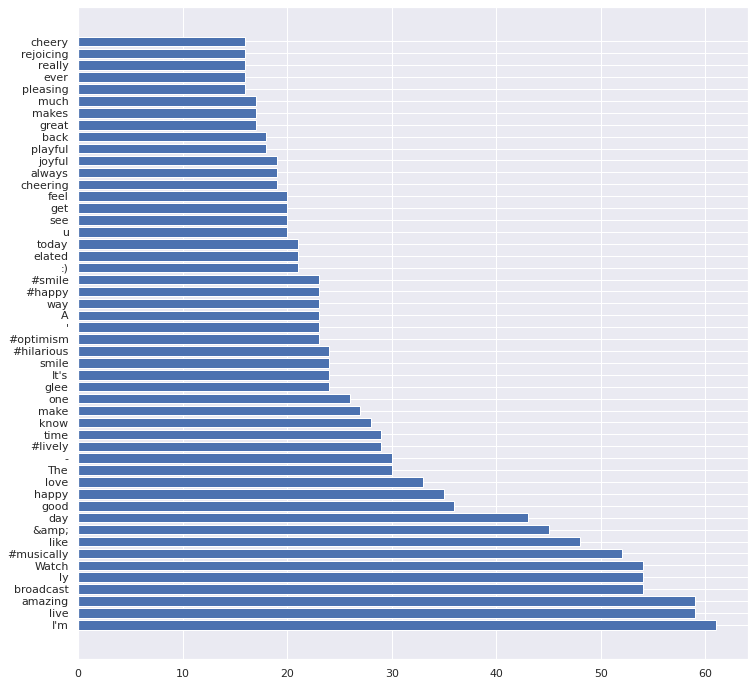

In [26]:
most_frequent_tokens(df, 'joy')

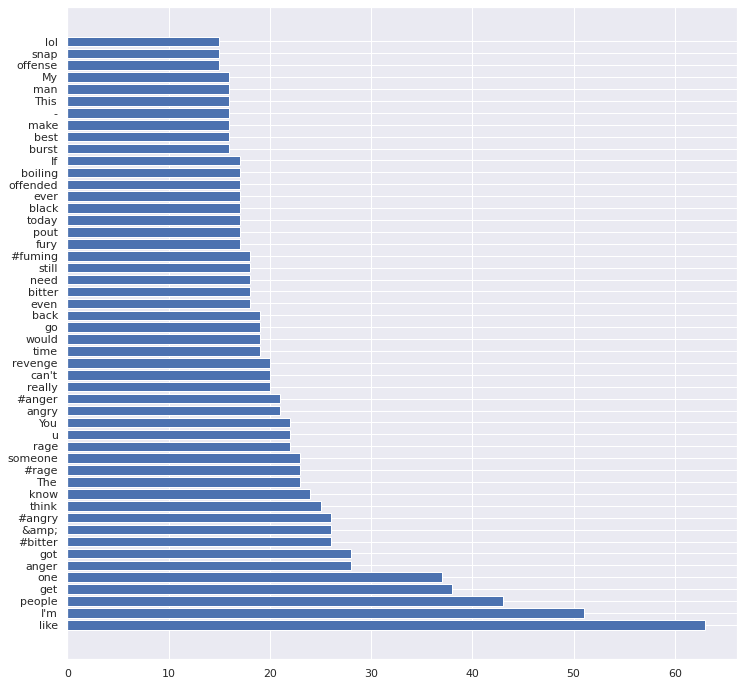

In [27]:
most_frequent_tokens(df, 'anger')

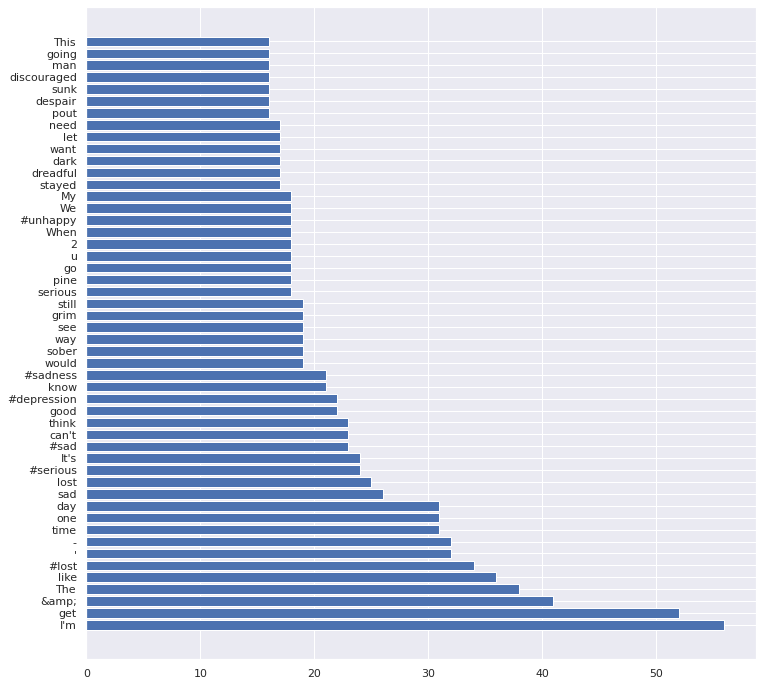

In [28]:
most_frequent_tokens(df, 'sadness')

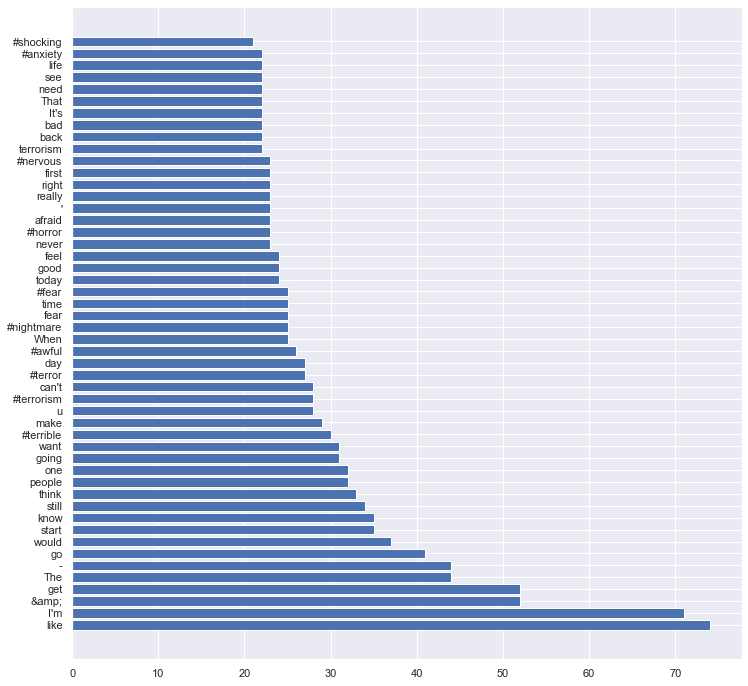

In [58]:
most_frequent_tokens(df, 'fear')

In [65]:
def show_topn(df, emotion='joy', n=5):
    tmp_df = df[df['emotion']==emotion]
    tmp_df = tmp_df.sort_values('degree', ascending=False).reset_index()
    tmp_df = tmp_df.loc[:n]
    for value in tmp_df.iterrows():
        value = value[1]
        print(30*'-')
        print('Emotion : {}'.format(value[1]))
        print('Degree : {}'.format(value[2]))
        print('Sentence : {}'.format(value[3]))
        

In [66]:
show_topn(df, emotion='joy')

------------------------------
Emotion : Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious
Degree : joy
Sentence : 0.98
------------------------------
Emotion : Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! 😂
Degree : joy
Sentence : 0.958
------------------------------
Emotion : Been waiting all week for this game ❤️❤️❤️ #cheer #friday ❤️
Degree : joy
Sentence : 0.94
------------------------------
Emotion : @gardiner_love : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! 😊💕
Degree : joy
Sentence : 0.938
------------------------------
Emotion : I feel so blessed to work with the family that I nanny for ❤️ nothing but love &amp; appreciation, makes me smile.
Degree : joy
Sentence : 0.938
------------------------------
Emotion : Today I reached 1000 subscribers on YT!! , #goodday, #thankful
Degree : joy
Sentence : 0.926


In [67]:
show_topn(df, emotion='sadness')

------------------------------
Emotion : Depression sucks! #depression
Degree : sadness
Sentence : 0.958
------------------------------
Emotion : Feeling worthless as always 
Degree : sadness
Sentence : 0.958
------------------------------
Emotion : Feeling worthless as always #depression
Degree : sadness
Sentence : 0.958
------------------------------
Emotion : My #Fibromyalgia has been really bad lately which is not good for my mental state. I feel very overwhelmed #anxiety #bipolar #depression
Degree : sadness
Sentence : 0.946
------------------------------
Emotion : Im think ima lay in bed all day and sulk. Life is hitting me to hard rn
Degree : sadness
Sentence : 0.934
------------------------------
Emotion : So when I try I fail... and when I don't try... I still fail... #confused and #lost
Degree : sadness
Sentence : 0.917


In [68]:
show_topn(df, emotion='anger')

------------------------------
Emotion : How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
Degree : anger
Sentence : 0.938
------------------------------
Emotion : Why does @dapperlaughs have to come to Glasgow on a night I am working. I am fucking gutted, been waiting for an appearance for ages #raging
Degree : anger
Sentence : 0.938
------------------------------
Emotion : Still can't log into my fucking Snapchat#Snapchat #snap
Degree : anger
Sentence : 0.9
------------------------------
Emotion : @DPD_UK I asked for my parcel to be delivered to a pick up store not my address #fuming #poorcustomerservice
Degree : anger
Sentence : 0.896
------------------------------
Emotion : so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######
Degree : anger
Sentence : 0.896
------------------------------
Emotion : Don't join @BTCare they put the phone down on you, talk ov

In [69]:
show_topn(df, emotion='fear')

------------------------------
Emotion : I feel like I am drowning. #depression #anxiety #falure #worthless
Degree : fear
Sentence : 0.979
------------------------------
Emotion : I get so nervous even thinking about talking to ****** I wanna die
Degree : fear
Sentence : 0.979
------------------------------
Emotion : I lost my blinders .... #panic
Degree : fear
Sentence : 0.975
------------------------------
Emotion : I feel like I am drowning. #depression  #falure #worthless
Degree : fear
Sentence : 0.938
------------------------------
Emotion : This is the scariest American Horror Story out of all of them... I'm gonna have to watch in the daytime. #frightened
Degree : fear
Sentence : 0.938
------------------------------
Emotion : @mgcsartwork I nearly started crying and having a full on panic attack after tatinof bc of the crowds so I feel him
Degree : fear
Sentence : 0.938
